In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
sns.set()

# Path to your CSV files
file_path = '/shared/share_mamaysky-glasserman/energy_drivers/2023/DataProcessing/article_measure/rolling_freq/*.csv'

# Load all dataframes from 199601 to 202303
all_files = glob.glob(file_path)
all_files.sort()

In [2]:
dfs = []
for file in all_files:
    df = pd.read_csv(file, index_col=0)
    df.index.name = 'word'
    df.rename(columns={'0':'frequency'}, inplace=True)
    # Extract the date from the filename (e.g., '199602' from '199602_freq.csv')
    date = int(file.split('/')[-1][:6])
    df['date'] = date
    dfs.append(df)

# Combine all dataframes into one
full_df = pd.concat(dfs)

# Split the data into two sets: up to 200910 and the full sample
df_up_to_200910 = full_df[full_df['date'] <= 200910]
df_after_200910 = full_df[full_df['date'] > 200910]
df_full = full_df

# Group by words and calculate the mean frequency for each set
freq_up_to_200910 = df_up_to_200910.groupby('word').mean()
freq_after_200910 = df_after_200910.groupby('word').mean()
freq_full = df_full.groupby('word').mean()

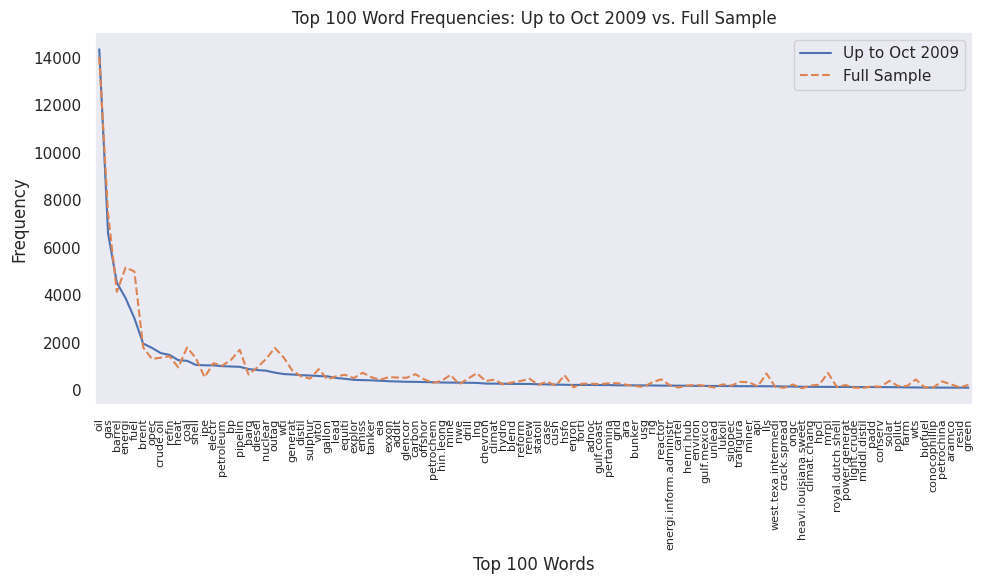

In [17]:
num_top_words = 100
# Find top 20 most frequent words in the full sample
top_words = freq_up_to_200910.nlargest(num_top_words, 'frequency').index

# Plot comparison for top 20 most frequent words
plt.figure(figsize=(10, 6))

plt.plot(freq_up_to_200910.loc[top_words].index, freq_up_to_200910.loc[top_words]['frequency'], label='Up to Oct 2009')
#plt.plot(freq_after_200910.loc[top_words].index, freq_after_200910.loc[top_words]['frequency'], label='After Oct 2009')
plt.plot(freq_full.loc[top_words].index, freq_full.loc[top_words]['frequency'], '--', label='Full Sample')

plt.xticks(rotation=90, fontsize=8)
plt.xlabel(f'Top {num_top_words} Words')
plt.ylabel('Frequency')
plt.title(f'Top {num_top_words} Word Frequencies: Up to Oct 2009 vs. Full Sample')
plt.legend()
# Remove grid
plt.grid(False)

# Remove indentations on x-axis by setting the limits
plt.xlim(left=-0.5, right=len(top_words)-0.5)


plt.tight_layout()
plt.savefig('frequencyAnalysis.pdf')
plt.show()

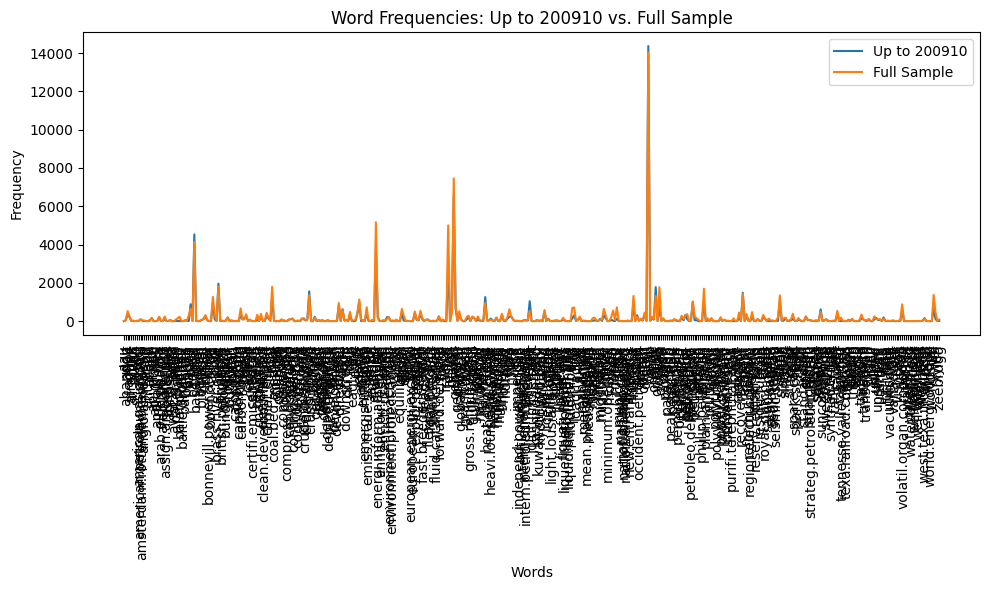

In [32]:
# Plot comparison
plt.figure(figsize=(10, 6))

plt.plot(freq_up_to_200910.index, freq_up_to_200910['frequency'], label='Up to 200910')
plt.plot(freq_full.index, freq_full['frequency'], label='Full Sample')

plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequencies: Up to 200910 vs. Full Sample')
plt.legend()

plt.tight_layout()
plt.show()
